# Data 512 Final Project: Pursuit of Happiness
Reynaldo Adji - adjir@uw.edu
___
<br>
### Introduction
*“Life, Liberty, and the pursuit of Happiness”*
- United States Declaration of Independence

"The pursuit of happiness" that founding fathers of United States declared is not only inherent to Americans, but also to the rest of the world. Instead of attempting to answer the impossible question "what is happiness?", I try to evaluate what the key ingredients to happiness and to find actionable findings that can be applied to citizens of countries around the world.

Since 2012, Gallup has been publishing World Happiness Report every year. The main source for the report is Gallup World Poll, which asks more than 600 questions to 1000 individuals in more than 150 countries. Each question uses Cantril ladder to measure the answer (Cantril ladder is a scoring system from 0 - 10 whereas 0 represents the worst situation and 10 represents the best). Gallup's researchers analyze the answers to rate key factors, which in turn aggregated to form a Happiness Score for each country; countries then ranked based on their Happiness Score.
<br>
### Background
Beside crunching the numbers from the poll, the World Happiness Report delves on various topics, e.g. "Growth and Happiness in China, 1990-2015" or "'Waiting for Happiness' in Africa", using the key happiness predictors and score. While not directly related to the topics covered in the report, my research questions are nevertheless inspired by those.
My first research question revolves around economy and happiness relationship. Using GDP per capita score and actual dollar number, I hypothesize economy is the most significant predictor for happiness score and its prediction power is getting larger every year.
The second research question is what the next biggest factor for happiness after economy. My hypothesis points to family or social support impacts happiness almost as much as economy or GDP per capita. My second hypothesis for this research question is a case study on United States. It is a well-known sentiment that Americans are getting less happy each year, and yet their GDP per capita has actually been keep increasing. If this hypothesis is true, it is worth exploring why Americans become antithesis of the first research question.
<br>
### Methods
My initial plan is to use multiple linear regression to model interaction between happiness score and the key predictors in addition to residual component. Unfortunately, the report uses the most rudimentary model to calculate happiness score, which I will describe in detail later. Hence, it reduces my options to calculate Pearson correlation coefficient or 1-to-1 single linear regression model between happiness and a key predictor. Nevertheless, I gain useful insights by applying those methods to the World Happiness dataset.

### Data
The main source of data is 3 CSV files from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness): 2015, 2016, and 2017 World Happiness dataset.
Each dataset contains a column of 
* Country: Country name
* Happiness Rank: Country rank based on happiness score. Lower rank means happier
* Happiness Score: Happiness score of the particular country
* Lower Quartile: Denotes the upper boundary of 95% confidence region
* Upper Quartile: Denotes the lower boundary of 95% confidence region
* Economy (GDP per Capita): Natural log of GDP per capita for the particular country, adjusted on 2011 international dollar value. 
* Family: Average response to family or social support questions, such as "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"
* Health (Life Expectancy): Constructed from World Health Organization (WHO) data. It basically measures life birth expectancy to life expectancy 
* Freedom: Average response to questions related to freedom to make life choices, such as "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"
* Generosity: Average response to altruism questions, such as "Have you donated money to a charity in the past month?" 
* Trust (Government Corruption): Average response to question "Is corruption widespread throughout the government/business or not?"
* Dystopia Residual: Unexplained component for each country.

Each key predictors (Economy, Family, Health, Freedom, Generosity, and Trust in Government) are scored relative to a fictious place, referred as "Dystopia", where all the key predictors are at absolute worst among all countries in the world. For example, Argentina is rated 1.440 for Family, meaning it is 1.440 better than Dystopia in term of Family.  

Initially I used World Bank dataset, in addition to World Happiness dataset, to replace the GDP per Capita score with actual dollar number for each country. However, the licensing has changed in the last few days to restricted.

#### Licenses
Kaggle datasets are released under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

### Results
The followings are my detailed findings regarding the research questions and hypothesis.

#### RQ 1: Can money buy happiness?
GDP per capita is one way to measure economic strength of a country, and I sense there is a strong relationship between economy and happiness. In this research question, I try to show how strong that relationship is and whether it is getting stronger year after year. Using both linear regression model and Pearson correlation coefficient, I derive how strong GDP per capita influences happiness score.

In [17]:
# All common imports
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Loading and cleaning data to pandas dataframes
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2015.columns = [x.replace(' ', '.') for x in df_2015.columns]
df_2015.columns = [x.replace('(', '.') for x in df_2015.columns]
df_2015.columns = [x.replace(')', '.') for x in df_2015.columns]
df_2016.columns = [x.replace(' ', '.') for x in df_2016.columns]
df_2016.columns = [x.replace('(', '.') for x in df_2016.columns]
df_2016.columns = [x.replace(')', '.') for x in df_2016.columns]

# Uniformize the country name
df_2017.loc[df_2017['Country'] == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'

##### H1a: GDP per capita is the strongest predictor of happiness
This hypothesis means more people feel their happiness related to their country's economy situation than any other factor.

In [18]:
# Calculating Pearson correlation coefficient of GDP and happiness
gdpcorr = {}
gdpcorr['2015'] = np.corrcoef(df_2015['Economy..GDP.per.Capita.'], df_2015['Happiness.Score'])[0,1]
gdpcorr['2016'] = np.corrcoef(df_2016['Economy..GDP.per.Capita.'], df_2016['Happiness.Score'])[0,1]
gdpcorr['2017'] = np.corrcoef(df_2017['Economy..GDP.per.Capita.'], df_2017['Happiness.Score'])[0,1]

print('Correlation of GDP per capita with happiness score in 2015 to 2017 are: {}'.format(gdpcorr))

Correlation of GDP per capita with happiness score in 2015 to 2017 are: {'2015': 0.7809655268660215, '2016': 0.7903220167261058, '2017': 0.81246875388664175}


Economy and happiness score are strongly correlated, with all coefficients above 0.78.

/Users/radji/OneDrive/Documents/MSDS/msdsenv/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


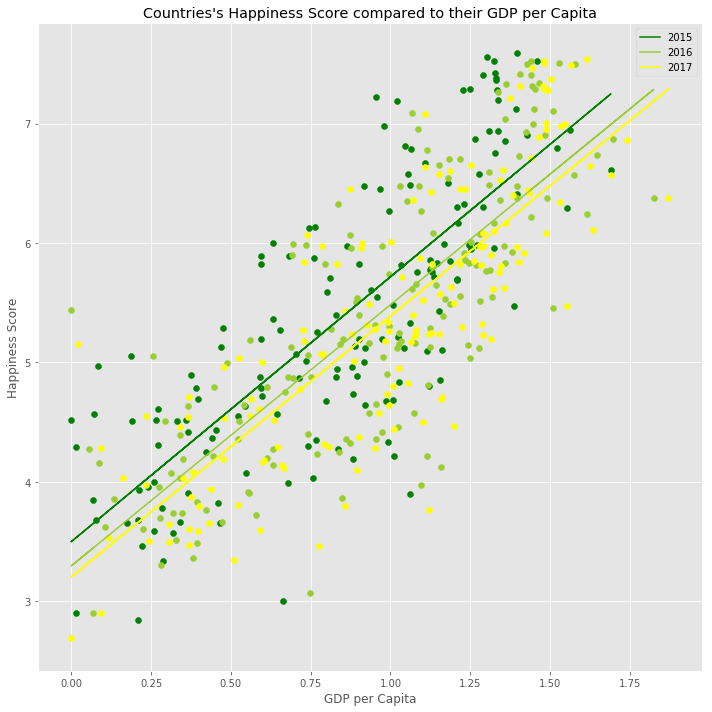

In [19]:
# Fitting only GDP per Capita to Happiness Score linear regression model
hs_2015 = df_2015['Happiness.Score']
hs_2016 = df_2016['Happiness.Score']
hs_2017 = df_2017['Happiness.Score']
gdp_2015 = df_2015['Economy..GDP.per.Capita.'].values.reshape(-1,1)
gdp_2016 = df_2016['Economy..GDP.per.Capita.'].values.reshape(-1,1)
gdp_2017 = df_2017['Economy..GDP.per.Capita.'].values.reshape(-1,1)

regr_2015 = linear_model.LinearRegression()
regr_2015.fit(gdp_2015, hs_2015)
regr_2016 = linear_model.LinearRegression()
regr_2016.fit(gdp_2016, hs_2016)
regr_2017 = linear_model.LinearRegression()
regr_2017.fit(gdp_2017, hs_2017)

# Plotting Happiness Score vs GDP for all countries
plt.figure(figsize=(10, 10))
plt.scatter(df_2015['Economy..GDP.per.Capita.'], df_2015['Happiness.Score'], color='green')
plt.scatter(df_2016['Economy..GDP.per.Capita.'], df_2016['Happiness.Score'], color='yellowgreen')
plt.scatter(df_2017['Economy..GDP.per.Capita.'], df_2017['Happiness.Score'], color='yellow')
plt.plot(gdp_2015, regr_2015.predict(gdp_2015), color='green')
plt.plot(gdp_2016, regr_2016.predict(gdp_2016), color='yellowgreen')
plt.plot(gdp_2017, regr_2017.predict(gdp_2017), color='yellow')
plt.legend(('2015','2016','2017'))
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Countries\'s Happiness Score compared to their GDP per Capita')
plt.tight_layout()
plt.savefig('happiness_score-gdp_per_capita-ln.png')
plt.show()

Not only regression model shows a strong interaction between GDP per capita and happiness score, but it also shows the relationship can be linear each year. Please note that the GDP per capita used are natural log of the real dollar value. I believe if I used real dollar value, it'll show a logarithmic regression between these two.

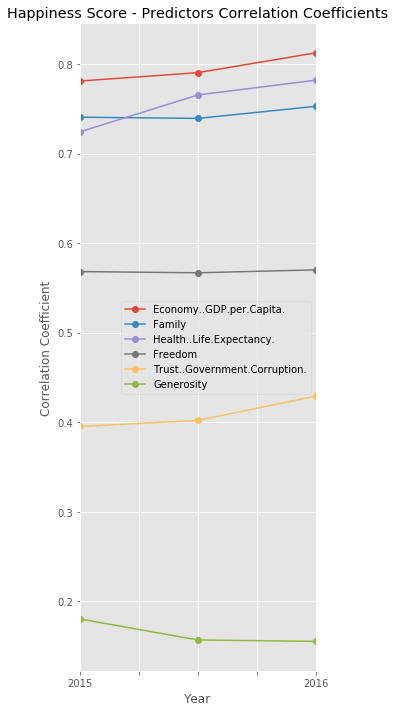

In [20]:
X_2015 = df_2015[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']]
y_2015 = df_2015['Happiness.Score']
X_2016 = df_2016[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']]
y_2016 = df_2016['Happiness.Score']
X_2017 = df_2017[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Trust..Government.Corruption.','Generosity', 'Dystopia.Residual']]
y_2017 = df_2017['Happiness.Score']

# Calculating Pearson correlation coefficient of Happiness and all features
corr = {}
corr['2015'] = pd.concat([y_2015, X_2015], axis=1).corr()['Happiness.Score']
corr['2016'] = pd.concat([y_2016, X_2016], axis=1).corr()['Happiness.Score']
corr['2017'] = pd.concat([y_2017, X_2017], axis=1).corr()['Happiness.Score']
df_corr = pd.DataFrame.from_dict(corr, orient='index')
df_corr = df_corr.drop(['Happiness.Score', 'Dystopia.Residual'], axis=1)
df_corr.plot(figsize=(5, 10), style = 'o-')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Happiness Score - Predictors Correlation Coefficients')
plt.tight_layout()
plt.savefig('predictors-corr.png')
plt.show()
# Plotting coefficients over year


GDP per capita has a higher correlation coefficient to happiness score among the predictors. 

##### H1b: GDP per Capita has larger impact to happiness each year 
Not only I believe GDP per capita has the largest impact on happiness, I also hypothesize that it is getting larger each year. In other words, more people feel their happiness or well-being are tied to the country's economic situation.

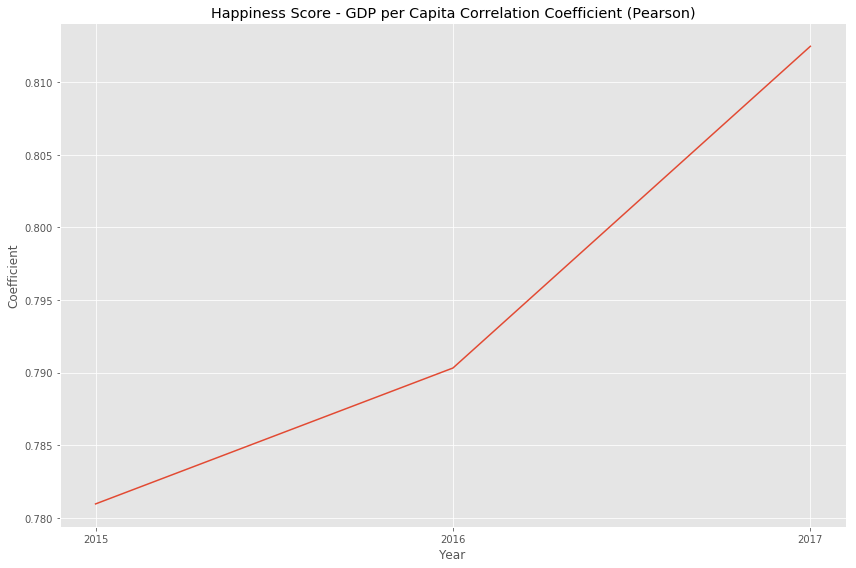

In [21]:
# Plotting coefficients over year
plt.figure(figsize=(12, 8))
plt.plot(gdpcorr.keys(), gdpcorr.values())
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.title('Happiness Score - GDP per Capita Correlation Coefficient (Pearson)')
plt.tight_layout()
plt.savefig('happiness_score-gdp_per_capita-corr.png')
plt.show()

The graph above shows how GDP per capita has larger impact to happiness each year. While the rise of economy's influence is not sharply sloped, It is still trending upward.

**The evidence above supports both H1a and H1b hypotheses. Indeed, money can buy happiness.**

#### RQ 1:  What else beside money really impact happiness?
While economy is an obvious guess for the most significant predictor of happiness, I am virtually clueless about the next biggest predictor. Using the same methods (Pearson correlation coefficient and individual linear regression), I try to gauge how much of a factor the rest of predictors are.

#### H2a: Family has the strongest correlation for non-economy predictor

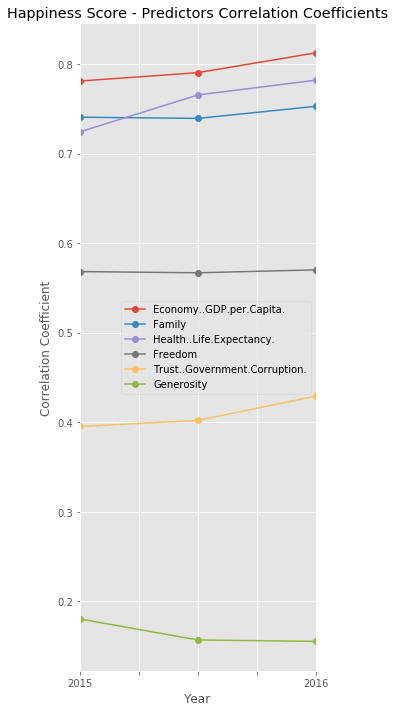

All correlation coefficients between happiness score and 6 predictors: 
       Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
2015                  0.780966  0.740605                  0.724200  0.568211   
2016                  0.790322  0.739252                  0.765384  0.566827   
2017                  0.812469  0.752737                  0.781951  0.570137   

      Trust..Government.Corruption.  Generosity  
2015                       0.395199    0.180319  
2016                       0.402032    0.156848  
2017                       0.429080    0.155256  


In [22]:
df_corr.plot(figsize=(5, 10), style = 'o-')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.title('Happiness Score - Predictors Correlation Coefficients')
plt.tight_layout()
plt.savefig('predictors-corr.png')
plt.show()

print('All correlation coefficients between happiness score and 6 predictors: \n {}'.format(df_corr))

Family or social support is indeed the next biggest predictor after economy according to correlation coefficient, and it also trending upward. However, the largest correlation changes from 2016 to 2017 is trust in government improvement (0.027048 correlation changes). It is even clearer if the correlation coefficient changes from 2015-2016 and 2016-2017 are plotted,

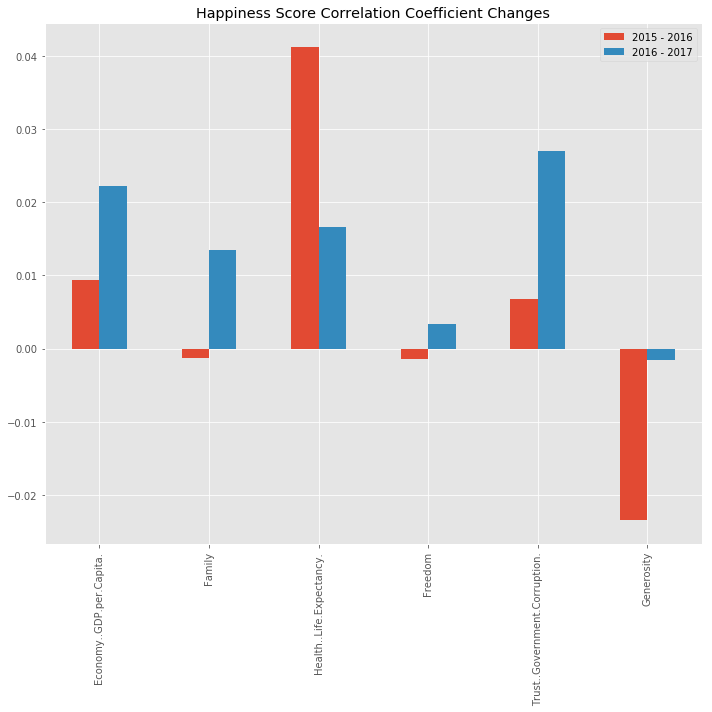

In [23]:
# calculating the changes in one year for each predictor
corrdiff_df = df_corr.diff()
corrdiff_df = corrdiff_df.drop(['2015']).transpose()
corrdiff_df.plot.bar(figsize=(10, 10))
plt.legend(('2015 - 2016','2016 - 2017'))
plt.title('Happiness Score Correlation Coefficient Changes')
plt.tight_layout()
plt.savefig('corr-changes.png')
plt.show()

Hence, 
**H2a hypothesis (Family has the strongest correlation for non-economy predictor)** is accurate, but trust in government deserves special attention according to the trend.

#### H2b: Americans are becoming less happy despite increases in GPD per Capita
One of the more interesting phenomenon related to happiness is how Americans are getting less happy each year regardless the improving situation. I set out to find whether that sentiment is true, and if it is, what might be the root cause.

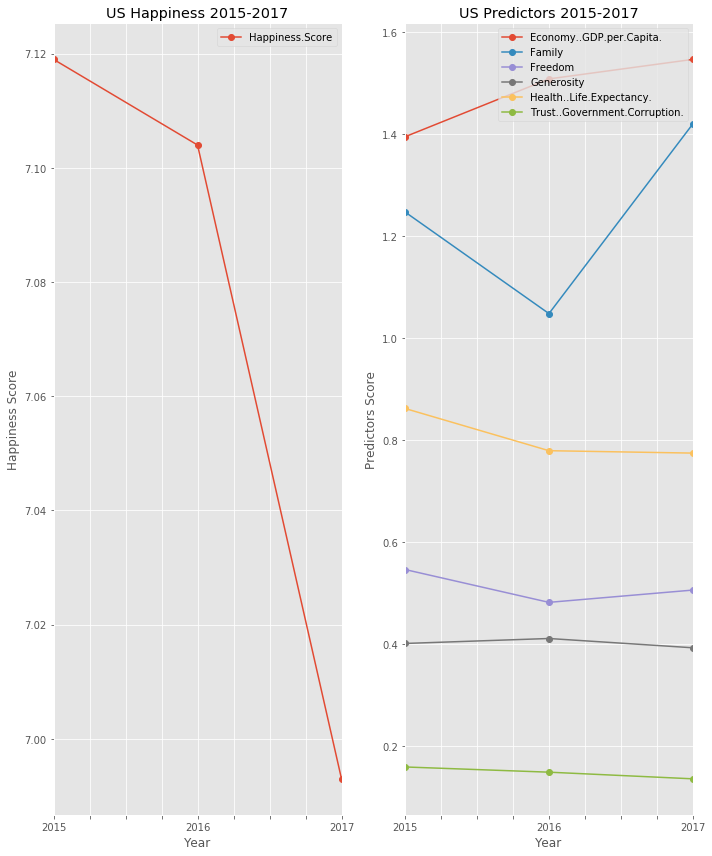

In [24]:
# Load US 

us_2015 = df_2015.loc[df_2015['Country'] == 'United States']
us_2015 = us_2015.drop(['Country', 'Region', 'Happiness.Rank', 'Standard.Error'], axis=1)
us_2016 = df_2016.loc[df_2016['Country'] == 'United States']
us_2016 = us_2016.drop(['Country', 'Region', 'Happiness.Rank', 'Lower.Confidence.Interval', 'Upper.Confidence.Interval'], axis=1)
us_2017 = df_2017.loc[df_2017['Country'] == 'United States']
us_2017 = us_2017.drop(['Country', 'Happiness.Rank', 'Whisker.low', 'Whisker.high'], axis=1)

new_index = ['2015', '2016', '2017']
us_df = pd.concat([us_2015, us_2016, us_2017], ignore_index=True)
us_df.index = new_index

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,12))

us_df[['Happiness.Score']].plot(ax=axes[0], style = 'o-')
axes[0].set_title('US Happiness 2015-2017')
axes[0].set_ylabel('Happiness Score')
axes[0].set_xlabel('Year')

us_df.drop(['Happiness.Score', 'Dystopia.Residual'], axis=1).plot(ax=axes[1], style = 'o-')
axes[1].set_title('US Predictors 2015-2017')
axes[1].set_ylabel('Predictors Score')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.savefig('US.png')
plt.show()

As you can see from the left graph, Americans are indeed getting less happy year after year, and there is no obvious explanation for it. GDP per capita increases every year, and family's score dropped in 2016 compared to 2015, but it bounces back in 2017. Other predictors are either flat or changes in insignificant manner, but they do not explain sharp decline in United States' happiness mood. Gallup's researchers blame this decline on the Dystopia Residual, which is an unexplained component for each country.
**H2b (Americans are becoming less happy despite increases in GPD per Capita) hypothesis is also proven by the evidence above**, but it is not easily explained.

### Discussion 
There are several limitations in this project. First, the World Happiness dataset seems suitable for multiple regression model to multiple key features. However, when I fit 2017 dataset into multiple regression, this is what it looks like
<br>

In [25]:
import statsmodels.api as sm

y = df_2017['Happiness.Score']
X = df_2017[['Economy..GDP.per.Capita.', 'Family','Health..Life.Expectancy.', 'Freedom', 'Generosity','Trust..Government.Corruption.', 'Dystopia.Residual']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness.Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.442e+08
Date:                Sat, 09 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:02:25   Log-Likelihood:                 1048.9
No. Observations:                 155   AIC:                            -2082.
Df Residuals:                     147   BIC:                            -2057.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**All the coefficients are 1 or very close to 1!!** 
This means the Happiness Score is simply a sum of all the predictors. I do not believe a simple model like that is sufficient to explain a complicated relationship between happiness and the key predictors. Furthermore, Gallup does not publish its raw poll result; consequently, I cannot evaluate the accuracy of predictors score or use a different analysis method.
The above situation restricts my option to Pearson correlation coefficient, which brings another caveat that we have heard many times before, correlation does not imply causation. Some of these predictors can easily be unrelated to happiness or even the indirect effect of happiness itself. For example, when people happy, they tend to buy more things, which in turn goose up the economy, when people happy they tend to donate more to the less fortunate people, etc.
Finally, I personally believe there should be a lot more predictors for happiness, e.g. nation diversity, inequality. Economy as the most important predictor for happiness is almost inarguable, but GDP per capita is only one of the economic indicators; Genuine Progress Indicator (GPI) might provide more accurate reading of economy.

### Conclusion
Based on the findings above, my suggestion to the policy makers around the world is to focus on improving economy of their countrymen. Barring any easy economical upgrade, it behooves the government to take a look at the existing family or social support and find a way to improve it without incurring too much burden to the economy. A more affordable and yet effective way to improve people sentiment is to fix how the government is ran. However, looking yourself in the mirror and committing yourself to change can be very hard. For common people who yearn happiness, my half-joking suggestion is to immigrate to Western European or Scandinavian countries.

All things considered, World Happiness Report is a very solid first step in understanding and quantifying factors that make up happiness. It enables testing some of the long-standing beliefs, such as economy is the most important indicator of happiness, and Americans are getting less happy. On the other hand, I found the happiness formula is too rudimentary and the number of key predictors too few, and these prevents me from finding answers to deeper questions. I hope in the future Gallup includes more answers to their survey questions to their dataset, and start experimenting with more complex model to predict happiness score.
<br>

### References
1. John Helliwell, Richard Layard, and Jeffrey Sachs. [World Happiness Report 2017](http://worldhappiness.report/ed/2017/). *Sustainable Development Solutions Network*, 2017.
2. John Clifton. [The Happiest and Unhappiest Countries in the World](http://news.gallup.com/opinion/gallup/206468/happiest-unhappiest-countries-world.aspx). *Gallup News Blog*, March 20, 2017.
3. [Understanding How Gallup Uses the Cantrill Scale](http://news.gallup.com/poll/122453/Understanding-Gallup-Uses-Cantril-Scale.aspx?utm_source=link_newsv9&utm_campaign=item_206468&utm_medium=copy). *Gallup News Blog*.
4. Tim Worstall. [World Happiness Report: Even Jeff Sachs and Richard Layard Don't Really Believe It](https://www.forbes.com/sites/timworstall/2012/04/04/world-happiness-report-even-jeff-sachs-and-richard-layard-dont-really-believe-it/#7c5d7b39191b). *Forbes*, April 4, 2012.
5. Livia Gershon. [Happiness is the new GDP](https://qz.com/663110/happiness-is-the-new-gdp/). *Quartz*, April 16, 2016.